In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\vivek\Desktop\machine failure dataset\train.csv\train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
len(df['Product ID'].unique())

9976

In [6]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [7]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df2=df.drop(['id','Product ID','Type'],axis=1)

In [10]:
X=df2.drop('Machine failure',axis=1)
y=df2['Machine failure']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [12]:
xtrain.shape

(95500, 10)

In [13]:
ytrain.shape

(95500,)

In [14]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
model=BalancedRandomForestClassifier()
model_brf=model.fit(xtrain,ytrain)
pred=model_brf.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     40272
           1       0.20      0.91      0.33       657

    accuracy                           0.94     40929
   macro avg       0.60      0.92      0.65     40929
weighted avg       0.99      0.94      0.96     40929



In [18]:
confusion_matrix(ytest,pred)

array([[37879,  2393],
       [   60,   597]], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,recall_score,roc_auc_score,classification_report,roc_curve

In [19]:
def evaluation(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print('accuracy',accuracy_score(acc,pred))
    print('recall',recall_score(acc,pred))
    print('auc_score',roc_auc_score(acc,pred))
    print('classification_report \n',classification_report(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [25]:
from catboost import CatBoostClassifier
lr=CatBoostClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

Learning rate set to 0.072176
0:	learn: 0.5201131	total: 24.1ms	remaining: 24s
1:	learn: 0.3914212	total: 49.3ms	remaining: 24.6s
2:	learn: 0.2965490	total: 74.1ms	remaining: 24.6s
3:	learn: 0.2222823	total: 95.9ms	remaining: 23.9s
4:	learn: 0.1718147	total: 111ms	remaining: 22.1s
5:	learn: 0.1334919	total: 128ms	remaining: 21.2s
6:	learn: 0.1066384	total: 145ms	remaining: 20.5s
7:	learn: 0.0866546	total: 161ms	remaining: 20s
8:	learn: 0.0724720	total: 176ms	remaining: 19.4s
9:	learn: 0.0621107	total: 196ms	remaining: 19.4s
10:	learn: 0.0543577	total: 219ms	remaining: 19.7s
11:	learn: 0.0479023	total: 237ms	remaining: 19.5s
12:	learn: 0.0429900	total: 253ms	remaining: 19.2s
13:	learn: 0.0393707	total: 269ms	remaining: 19s
14:	learn: 0.0363699	total: 286ms	remaining: 18.8s
15:	learn: 0.0340064	total: 301ms	remaining: 18.5s
16:	learn: 0.0322448	total: 318ms	remaining: 18.4s
17:	learn: 0.0306988	total: 334ms	remaining: 18.2s
18:	learn: 0.0294202	total: 350ms	remaining: 18.1s
19:	learn: 0.

164:	learn: 0.0187944	total: 3.88s	remaining: 19.6s
165:	learn: 0.0187853	total: 3.9s	remaining: 19.6s
166:	learn: 0.0187812	total: 3.92s	remaining: 19.6s
167:	learn: 0.0187670	total: 3.94s	remaining: 19.5s
168:	learn: 0.0187617	total: 3.96s	remaining: 19.5s
169:	learn: 0.0187591	total: 3.97s	remaining: 19.4s
170:	learn: 0.0187549	total: 3.99s	remaining: 19.4s
171:	learn: 0.0187269	total: 4.01s	remaining: 19.3s
172:	learn: 0.0187082	total: 4.03s	remaining: 19.3s
173:	learn: 0.0186865	total: 4.05s	remaining: 19.2s
174:	learn: 0.0186811	total: 4.07s	remaining: 19.2s
175:	learn: 0.0186646	total: 4.1s	remaining: 19.2s
176:	learn: 0.0186618	total: 4.12s	remaining: 19.2s
177:	learn: 0.0186585	total: 4.13s	remaining: 19.1s
178:	learn: 0.0186434	total: 4.15s	remaining: 19s
179:	learn: 0.0186398	total: 4.17s	remaining: 19s
180:	learn: 0.0186373	total: 4.18s	remaining: 18.9s
181:	learn: 0.0186347	total: 4.2s	remaining: 18.9s
182:	learn: 0.0186323	total: 4.21s	remaining: 18.8s
183:	learn: 0.01862

324:	learn: 0.0171870	total: 7.58s	remaining: 15.7s
325:	learn: 0.0171770	total: 7.62s	remaining: 15.8s
326:	learn: 0.0171721	total: 7.66s	remaining: 15.8s
327:	learn: 0.0171562	total: 7.7s	remaining: 15.8s
328:	learn: 0.0171254	total: 7.75s	remaining: 15.8s
329:	learn: 0.0171221	total: 7.79s	remaining: 15.8s
330:	learn: 0.0171099	total: 7.82s	remaining: 15.8s
331:	learn: 0.0170988	total: 7.86s	remaining: 15.8s
332:	learn: 0.0170796	total: 7.9s	remaining: 15.8s
333:	learn: 0.0170679	total: 7.94s	remaining: 15.8s
334:	learn: 0.0170621	total: 7.98s	remaining: 15.8s
335:	learn: 0.0170548	total: 8.02s	remaining: 15.8s
336:	learn: 0.0170402	total: 8.06s	remaining: 15.9s
337:	learn: 0.0170368	total: 8.1s	remaining: 15.9s
338:	learn: 0.0170315	total: 8.13s	remaining: 15.9s
339:	learn: 0.0170201	total: 8.17s	remaining: 15.9s
340:	learn: 0.0170181	total: 8.21s	remaining: 15.9s
341:	learn: 0.0170136	total: 8.24s	remaining: 15.8s
342:	learn: 0.0169980	total: 8.26s	remaining: 15.8s
343:	learn: 0.0

486:	learn: 0.0155700	total: 11.4s	remaining: 12s
487:	learn: 0.0155647	total: 11.4s	remaining: 11.9s
488:	learn: 0.0155603	total: 11.4s	remaining: 11.9s
489:	learn: 0.0155573	total: 11.4s	remaining: 11.9s
490:	learn: 0.0155569	total: 11.4s	remaining: 11.9s
491:	learn: 0.0155459	total: 11.5s	remaining: 11.8s
492:	learn: 0.0155277	total: 11.5s	remaining: 11.8s
493:	learn: 0.0155212	total: 11.5s	remaining: 11.8s
494:	learn: 0.0155135	total: 11.5s	remaining: 11.8s
495:	learn: 0.0155041	total: 11.5s	remaining: 11.7s
496:	learn: 0.0154937	total: 11.6s	remaining: 11.7s
497:	learn: 0.0154856	total: 11.6s	remaining: 11.7s
498:	learn: 0.0154692	total: 11.6s	remaining: 11.6s
499:	learn: 0.0154618	total: 11.6s	remaining: 11.6s
500:	learn: 0.0154511	total: 11.6s	remaining: 11.6s
501:	learn: 0.0154463	total: 11.7s	remaining: 11.6s
502:	learn: 0.0154294	total: 11.7s	remaining: 11.5s
503:	learn: 0.0154212	total: 11.7s	remaining: 11.5s
504:	learn: 0.0154138	total: 11.7s	remaining: 11.5s
505:	learn: 0.

646:	learn: 0.0143015	total: 15.2s	remaining: 8.31s
647:	learn: 0.0142864	total: 15.3s	remaining: 8.29s
648:	learn: 0.0142836	total: 15.3s	remaining: 8.27s
649:	learn: 0.0142679	total: 15.3s	remaining: 8.25s
650:	learn: 0.0142631	total: 15.3s	remaining: 8.22s
651:	learn: 0.0142600	total: 15.4s	remaining: 8.2s
652:	learn: 0.0142483	total: 15.4s	remaining: 8.17s
653:	learn: 0.0142309	total: 15.4s	remaining: 8.15s
654:	learn: 0.0142104	total: 15.4s	remaining: 8.13s
655:	learn: 0.0142013	total: 15.4s	remaining: 8.1s
656:	learn: 0.0141850	total: 15.5s	remaining: 8.07s
657:	learn: 0.0141669	total: 15.5s	remaining: 8.05s
658:	learn: 0.0141559	total: 15.5s	remaining: 8.02s
659:	learn: 0.0141509	total: 15.5s	remaining: 8s
660:	learn: 0.0141400	total: 15.5s	remaining: 7.97s
661:	learn: 0.0141228	total: 15.6s	remaining: 7.94s
662:	learn: 0.0141110	total: 15.6s	remaining: 7.92s
663:	learn: 0.0140999	total: 15.6s	remaining: 7.89s
664:	learn: 0.0140882	total: 15.6s	remaining: 7.87s
665:	learn: 0.014

812:	learn: 0.0132214	total: 19.2s	remaining: 4.42s
813:	learn: 0.0132194	total: 19.3s	remaining: 4.4s
814:	learn: 0.0132176	total: 19.3s	remaining: 4.38s
815:	learn: 0.0132157	total: 19.3s	remaining: 4.35s
816:	learn: 0.0132126	total: 19.3s	remaining: 4.33s
817:	learn: 0.0132107	total: 19.4s	remaining: 4.31s
818:	learn: 0.0132051	total: 19.4s	remaining: 4.28s
819:	learn: 0.0131981	total: 19.4s	remaining: 4.26s
820:	learn: 0.0131948	total: 19.4s	remaining: 4.23s
821:	learn: 0.0131919	total: 19.4s	remaining: 4.21s
822:	learn: 0.0131795	total: 19.4s	remaining: 4.18s
823:	learn: 0.0131772	total: 19.5s	remaining: 4.16s
824:	learn: 0.0131645	total: 19.5s	remaining: 4.13s
825:	learn: 0.0131592	total: 19.5s	remaining: 4.11s
826:	learn: 0.0131566	total: 19.5s	remaining: 4.08s
827:	learn: 0.0131539	total: 19.5s	remaining: 4.06s
828:	learn: 0.0131443	total: 19.5s	remaining: 4.03s
829:	learn: 0.0131408	total: 19.6s	remaining: 4.01s
830:	learn: 0.0131374	total: 19.6s	remaining: 3.98s
831:	learn: 0

979:	learn: 0.0122142	total: 22.4s	remaining: 457ms
980:	learn: 0.0122108	total: 22.4s	remaining: 434ms
981:	learn: 0.0122017	total: 22.5s	remaining: 412ms
982:	learn: 0.0121977	total: 22.5s	remaining: 389ms
983:	learn: 0.0121895	total: 22.5s	remaining: 366ms
984:	learn: 0.0121849	total: 22.5s	remaining: 343ms
985:	learn: 0.0121840	total: 22.5s	remaining: 320ms
986:	learn: 0.0121799	total: 22.5s	remaining: 297ms
987:	learn: 0.0121751	total: 22.6s	remaining: 274ms
988:	learn: 0.0121728	total: 22.6s	remaining: 251ms
989:	learn: 0.0121619	total: 22.6s	remaining: 228ms
990:	learn: 0.0121578	total: 22.6s	remaining: 205ms
991:	learn: 0.0121570	total: 22.6s	remaining: 183ms
992:	learn: 0.0121500	total: 22.7s	remaining: 160ms
993:	learn: 0.0121416	total: 22.7s	remaining: 137ms
994:	learn: 0.0121412	total: 22.7s	remaining: 114ms
995:	learn: 0.0121318	total: 22.7s	remaining: 91.2ms
996:	learn: 0.0121310	total: 22.7s	remaining: 68.4ms
997:	learn: 0.0121265	total: 22.7s	remaining: 45.6ms
998:	lear

confusion_matrix 
 [[40261    11]
 [  142   515]]
cohen_kappa_score 0.868794887713656
accuracy 0.996261819247966
recall 0.7838660578386606
auc_score 0.8917964576042727
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40272
           1       0.98      0.78      0.87       657

    accuracy                           1.00     40929
   macro avg       0.99      0.89      0.93     40929
weighted avg       1.00      1.00      1.00     40929



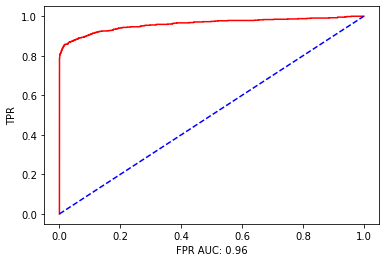

In [24]:
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

# Prediction for test data

In [26]:
test=pd.read_csv(r"C:\Users\vivek\Downloads\test.csv\test.csv")
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [28]:
testing=test.drop(['id','Product ID','Type'],axis=1)

In [30]:
a=model.predict(testing)

# making in Submission file

In [39]:
sub=pd.read_csv(r"C:\Users\vivek\Desktop\sample_submission.csv")
sub.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [40]:
sub['Machine failure']=a

In [41]:
sub.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [43]:
sub.to_csv('submission1.csv')